Notebook correspondant à la section 2.1.2 du rapport.
Détermination du taux d'apprentissage idéal pour la descente de gradient dans l'exemple à une dimension.

In [6]:
#imports
from numpy import pi, cos, dot, zeros, linspace, identity, argmin
from numpy.linalg import eigvals

from matplotlib.pyplot import plot, show, title, savefig

Paramètres du modèle

In [7]:
#nombre de coefficients de Fourier ajustables
M = 10
# nombre de points pour la variable indépendante
N = 100
#liste des points de test
X = linspace(0,1,N)

Matrice $\mathcal{M}$ telle que $\vec{g} = \mathcal{M} \vec{A} + \vec{d}$

In [8]:
mat = zeros((M,M))

for l in range(1,M+1) :
    for m in range(1,M+1) :
        mat[m-1,l-1] = m*l*dot(cos(2*pi*m*X), cos(2*pi*l*X))
mat *= 2*pi

Calcul des valeurs propres de la matrice $\mathcal{R}_\alpha = \mathcal{I}_M - \alpha \mathcal{M}$ puis détermination du module maximum parmis celles-ci.

In [9]:
alpha_list = linspace(6.2e-5, 6.3e-5, 10000)
max_mod = []

alpha_c = 0

for alpha in alpha_list :
    R = identity(M)-alpha*mat
    vals_propres = eigvals(R)
    v_max = max(abs(vals_propres))
    max_mod.append(v_max)
    if v_max <= 1 :
        alpha_c = alpha

alpha_min = alpha_list[argmin(max_mod)]
print("alpha_min = {}, alpha_c = {}".format(alpha_min,alpha_c))



alpha_min = 6.21894189418942e-05, alpha_c = 6.280708070807081e-05


Affichage des résultats

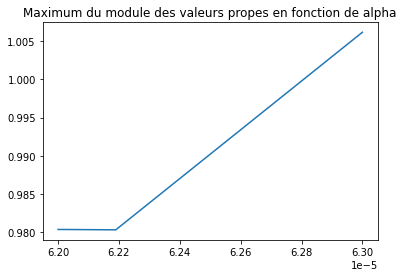

In [10]:
plot(alpha_list, max_mod)
title("Maximum du module des valeurs propes en fonction de alpha")
#ylim((0.90, 1.2))
#savefig("choix_alpha_cD_zoom.jpg")
show()